In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
import plotly.express as px
import warnings
warnings.simplefilter("ignore")

In [2]:
url = 'https://raw.githubusercontent.com/BhargavArunkumar/ExploratoryDataAnalysis/main/Student%20Performance%20in%20Exam/Data/StudentsPerformance.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [9]:
df['parental level of education'] = df['parental level of education'].str.replace('some high school', 'high school')
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school'], dtype=object)

In [10]:
df['percentage'] = ((df['math score']+df['reading score']+df['writing score'])/3)

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


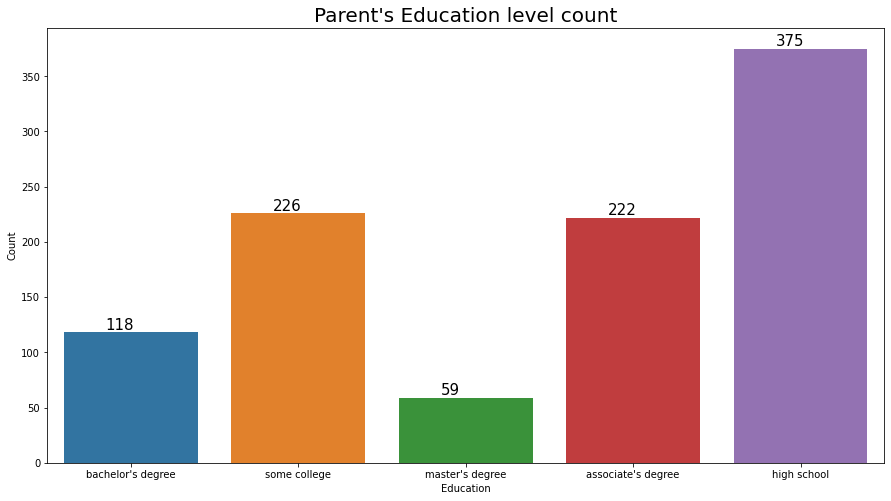

In [12]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df["parental level of education"])
plt.title("Parent's Education level count",fontsize=20)
plt.xlabel('Education')
plt.ylabel('Count')

for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

In [13]:
gen_count = df['gender'].value_counts().reset_index()
plt.figure(figsize=(15,8))
px.pie(gen_count , names='index',values='gender',title='Percnetage of Male and Female Students')

<Figure size 1080x576 with 0 Axes>

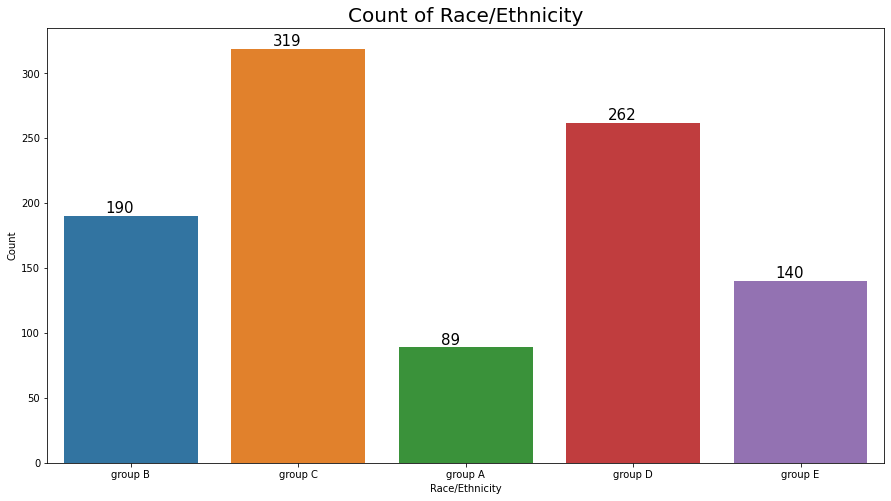

In [14]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df['race/ethnicity'])
plt.title('Count of Race/Ethnicity',fontsize=20)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')

for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

In [15]:
gen_count = df['lunch'].value_counts().reset_index()
plt.figure(figsize=(15,8))
px.pie(gen_count , names='index',values='lunch',title='Percnetage of Standard and Free/reduced Lunch')

<Figure size 1080x576 with 0 Axes>

In [16]:
x=df['test preparation course'].value_counts().reset_index()
px.pie(x,names='index',values='test preparation course',title="Percntage of Test Preperation Course(Completed or not)")

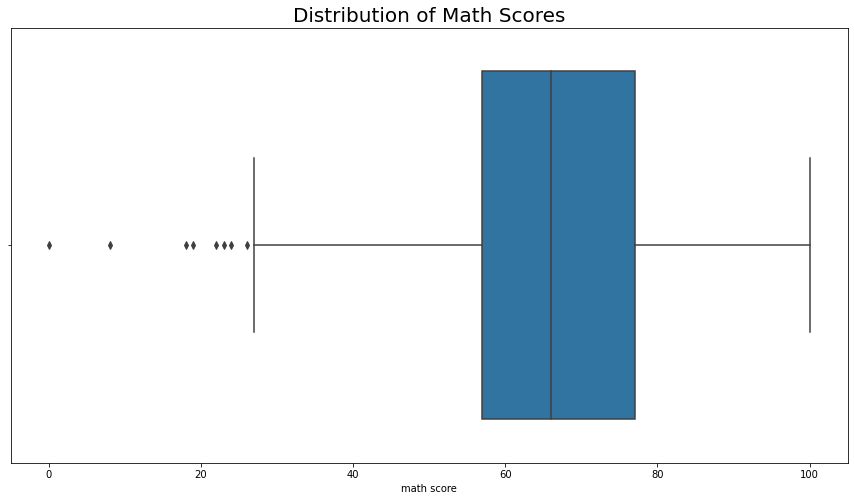

In [17]:
plt.figure(figsize = (15,8))
sns.boxplot(df['math score'])
plt.title('Distribution of Math Scores',fontsize = 20)
plt.show()

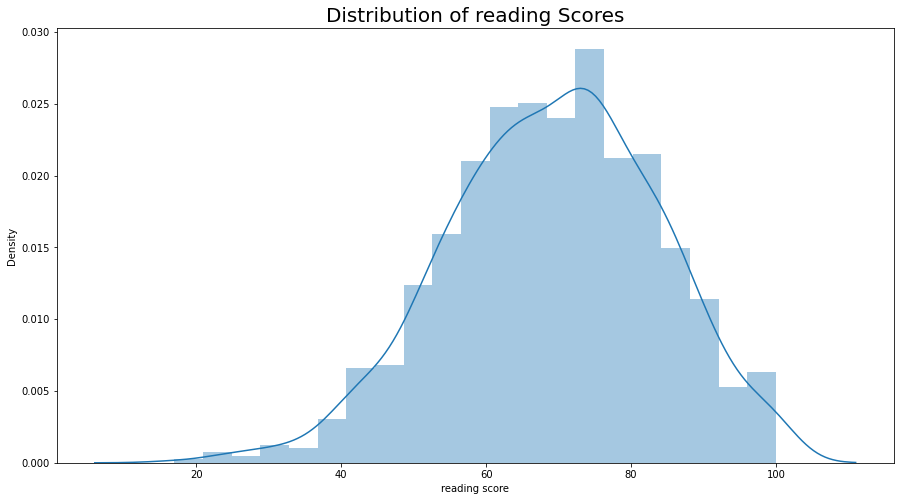

In [18]:
plt.figure(figsize = (15,8))
sns.distplot(df['reading score'])
plt.title('Distribution of reading Scores',fontsize = 20)
plt.show()

<Figure size 1080x576 with 0 Axes>

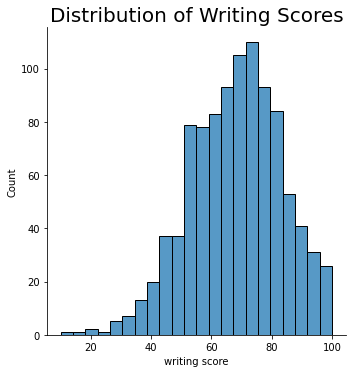

In [19]:
plt.figure(figsize = (15,8))
sns.displot(df['writing score'])
plt.title('Distribution of Writing Scores',fontsize = 20)
plt.show()

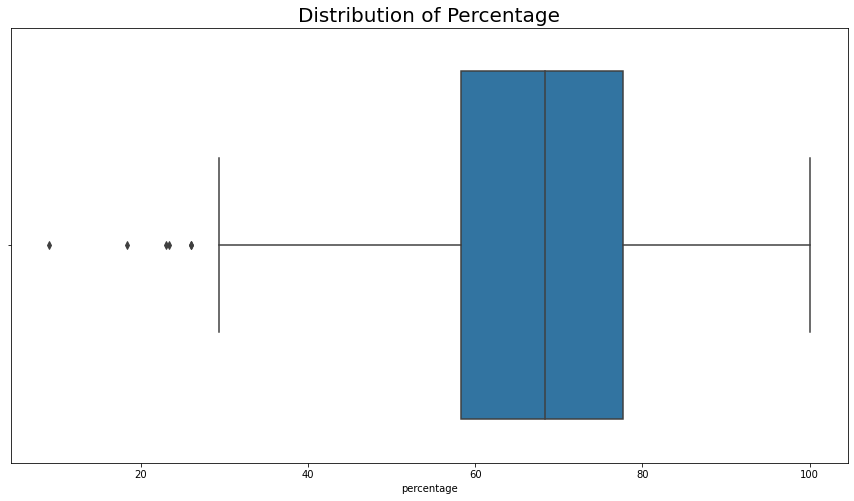

In [20]:
plt.figure(figsize = (15,8))
sns.boxplot(df['percentage'])
plt.title('Distribution of Percentage',fontsize = 20)
plt.show()

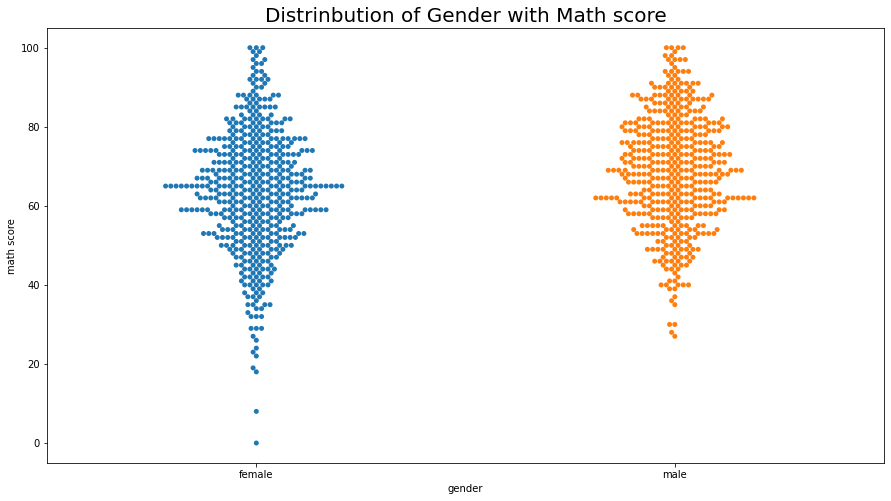

In [21]:
plt.figure(figsize = (15,8))
sns.swarmplot(x=df['gender'],y=df['math score'])
plt.title('Distrinbution of Gender with Math score',fontsize=20)
plt.show()

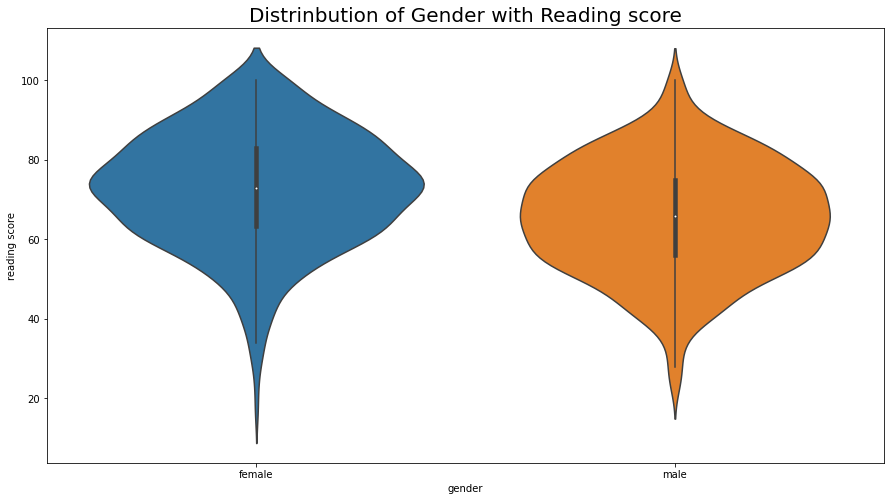

In [22]:
plt.figure(figsize = (15,8))
sns.violinplot(x=df['gender'],y=df['reading score'])
plt.title('Distrinbution of Gender with Reading score',fontsize=20)
plt.show()

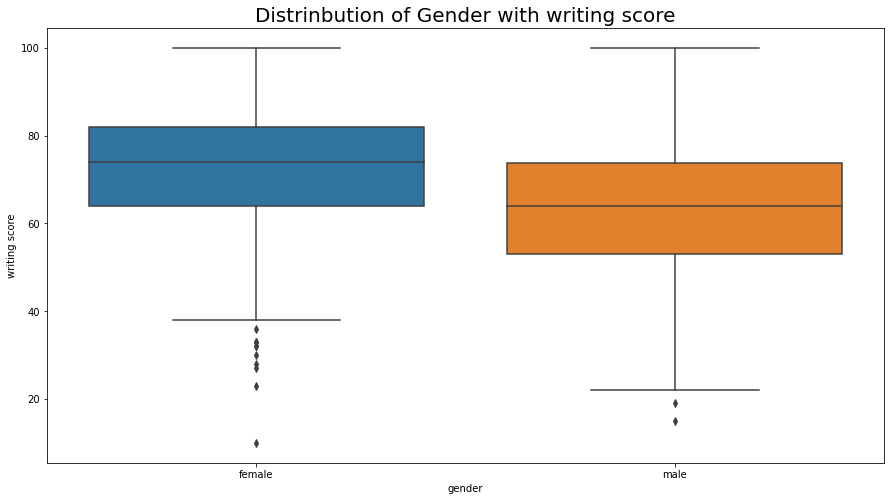

In [23]:
plt.figure(figsize = (15,8))
sns.boxplot(x=df['gender'],y=df['writing score'])
plt.title('Distrinbution of Gender with writing score',fontsize=20)
plt.show()

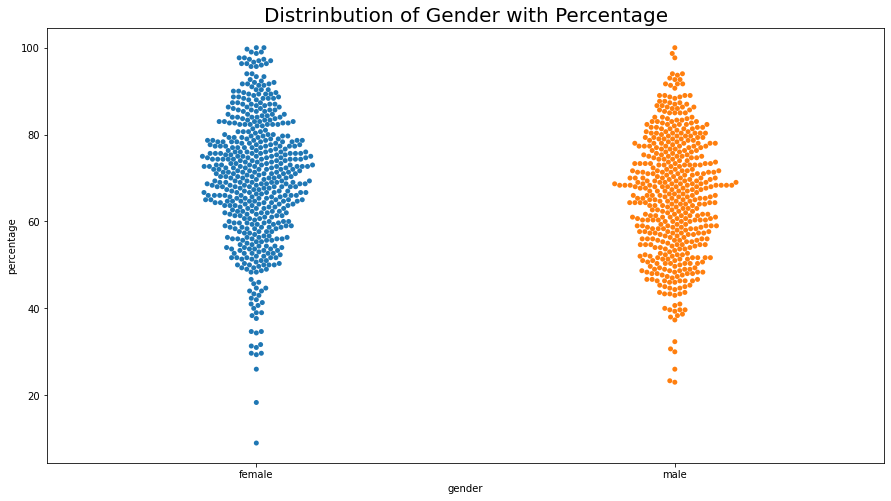

In [24]:
plt.figure(figsize = (15,8))
sns.swarmplot(x=df['gender'],y=df['percentage'])
plt.title('Distrinbution of Gender with Percentage',fontsize=20)
plt.show()

<Figure size 1080x576 with 0 Axes>

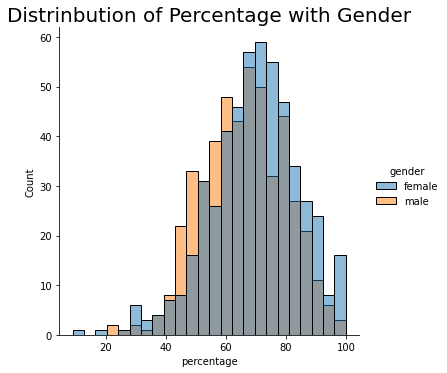

In [25]:
plt.figure(figsize = (15,8))
sns.displot(data=df  ,x='percentage',hue='gender')
plt.title('Distrinbution of Percentage with Gender',fontsize=20)
plt.show()

In [26]:
fig = px.box(df, x='parental level of education', y='writing score',labels=dict(
            Total='Passenger Class', Day_Avg='Age'))
fig.update_layout(title_text="Distribution of Writing Score With Parent's Education Level",title_x=0.5)
fig.show()

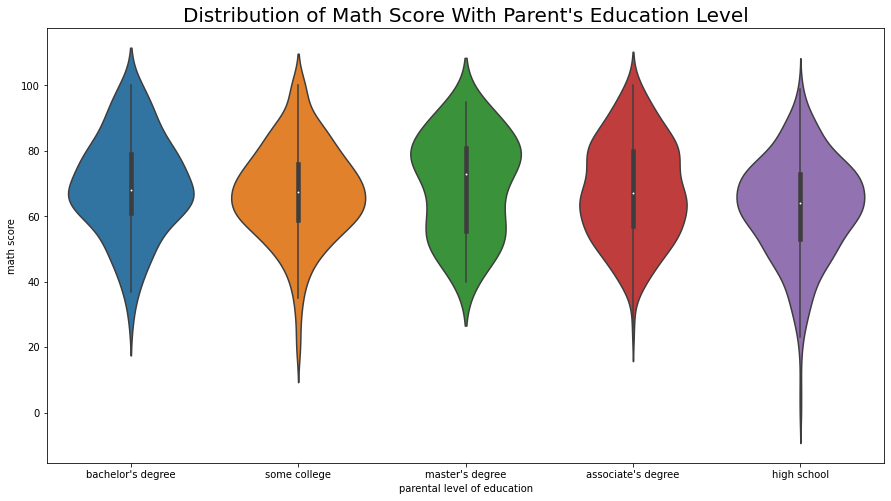

In [27]:
plt.figure(figsize = (15,8))
sns.violinplot(x=df['parental level of education'],y=df['math score'])
plt.title("Distribution of Math Score With Parent's Education Level",fontsize=20)
plt.show()

<Figure size 1080x576 with 0 Axes>

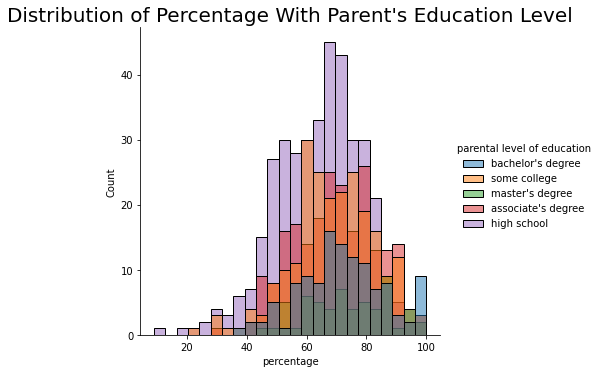

In [28]:
plt.figure(figsize = (15,8))
sns.displot(data=df  ,x='percentage',hue='parental level of education')
plt.title("Distribution of Percentage With Parent's Education Level",fontsize=20)
plt.show()

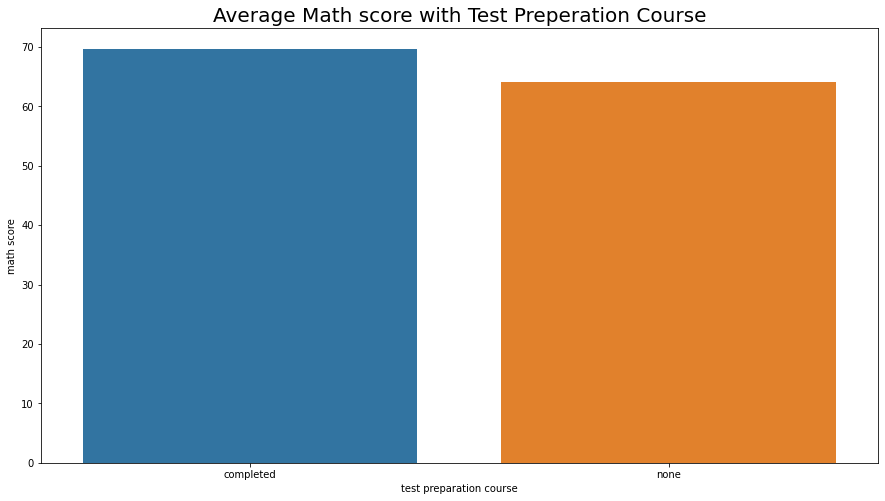

In [29]:
t=df.groupby(df['test preparation course'])['math score'].mean().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x=t['test preparation course'],y=t['math score'])
plt.title("Average Math score with Test Preperation Course",fontsize=20)
plt.show()

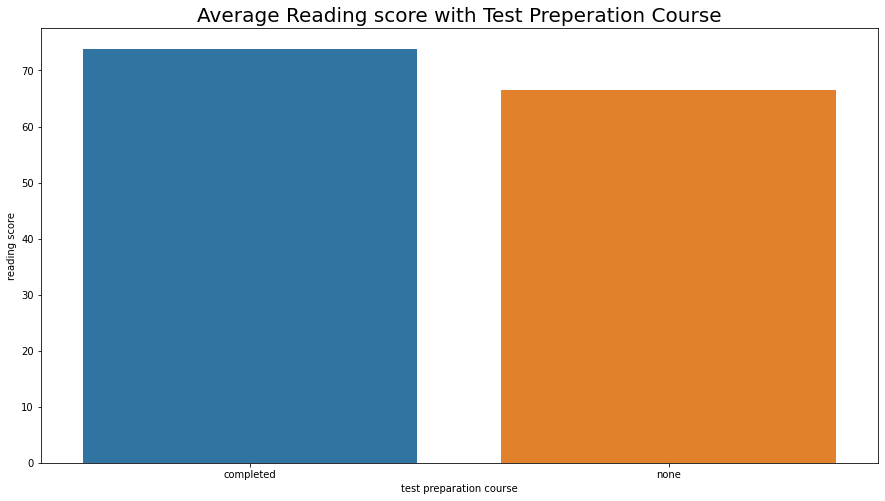

In [30]:
t=df.groupby(df['test preparation course'])['reading score'].mean().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x=t['test preparation course'],y=t['reading score'])
plt.title("Average Reading score with Test Preperation Course",fontsize=20)
plt.show()

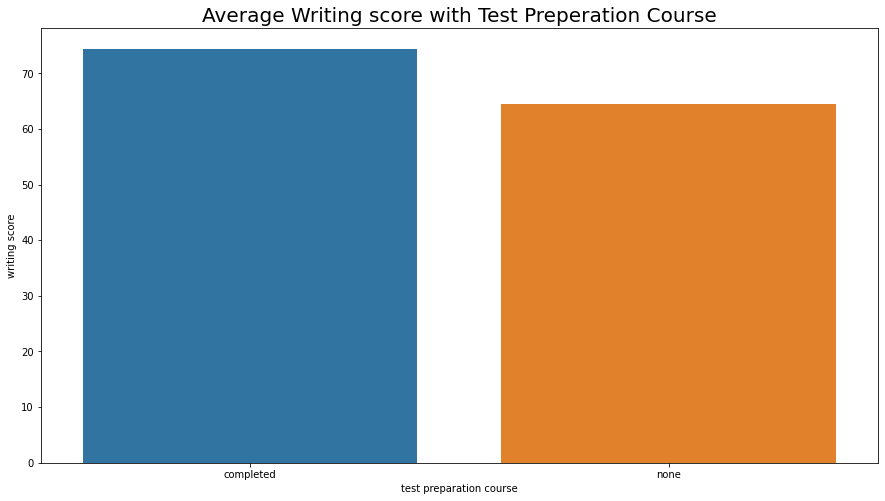

In [31]:
t=df.groupby(df['test preparation course'])['writing score'].mean().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x=t['test preparation course'],y=t['writing score'])
plt.title("Average Writing score with Test Preperation Course",fontsize=20)
plt.show()

<Figure size 1080x576 with 0 Axes>

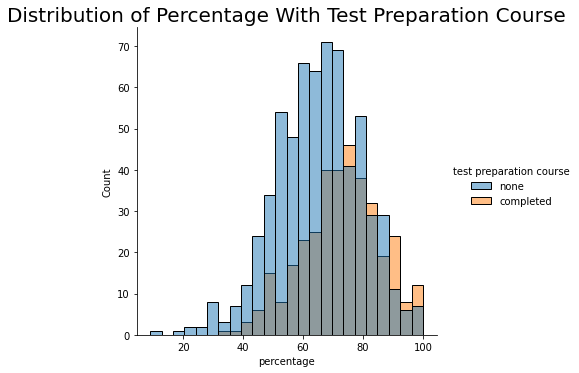

In [32]:
plt.figure(figsize = (15,8))
sns.displot(data=df  ,x='percentage',hue='test preparation course')
plt.title('Distribution of Percentage With Test Preparation Course',fontsize=20)
plt.show()

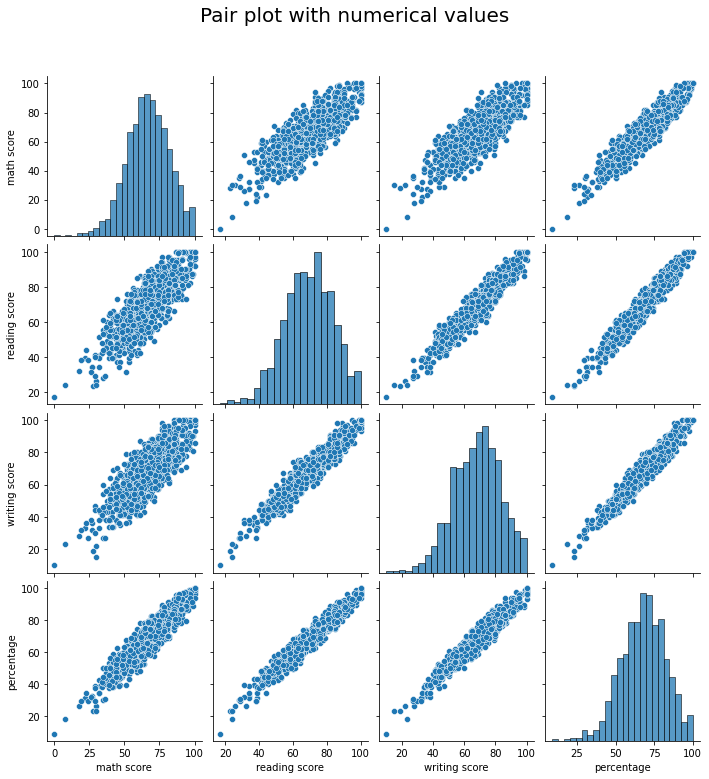

In [33]:
pair = sns.pairplot(df)
pair.fig.suptitle('Pair plot with numerical values',fontsize=20, y=1.08)
plt.show()

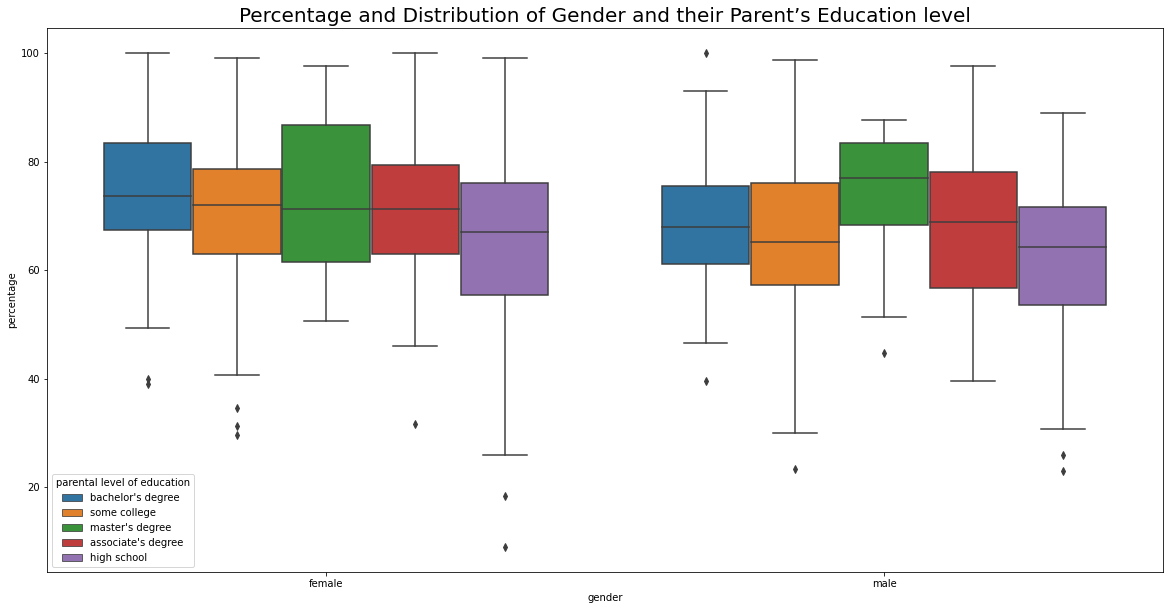

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['gender'],y=df['percentage'],hue=df['parental level of education'])
plt.title("Percentage and Distribution of Gender and their Parent’s Education level",fontsize=20)
plt.show()

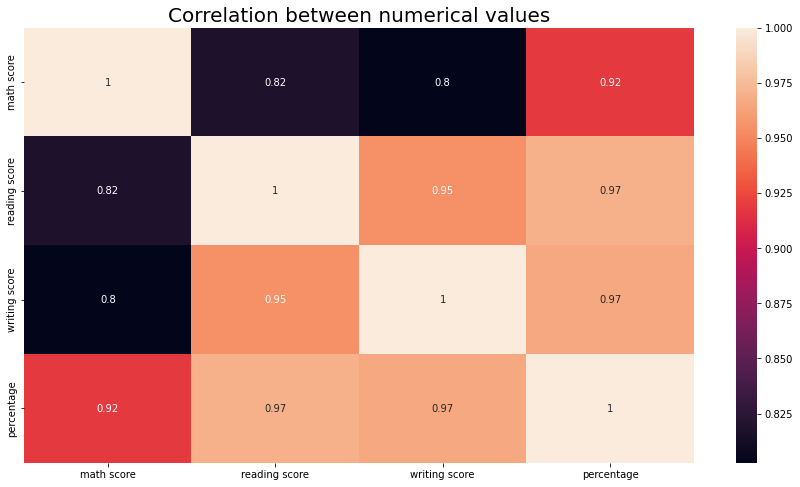

In [35]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.title('Correlation between numerical values',fontsize=20)
plt.show()